# Predict brand of car

My hypothesis is that the car model predictor does not learn to use the logo of the brand as a predictor as it has to choose between multiple models of the same brand. Let's investigate how our model fares when the task is to predict between brand of the car e.g Audi or Toyota.

We could then combine this predictor with the car model predictor to make better estimates.

In [3]:
from fastai.vision import *

In [4]:
path = Path('own_data/autot')

In [5]:
fnames = get_image_files(path, recurse=True)

In [6]:
tfms = get_transforms()

In [7]:
np.random.seed(93)
data = ImageDataBunch.from_name_func(path, fnames, ds_tfms=tfms, size=224, valid_pct = 0.2,
        label_func = lambda x: str(x).split('/')[-2].split('_')[0]).normalize(imagenet_stats)

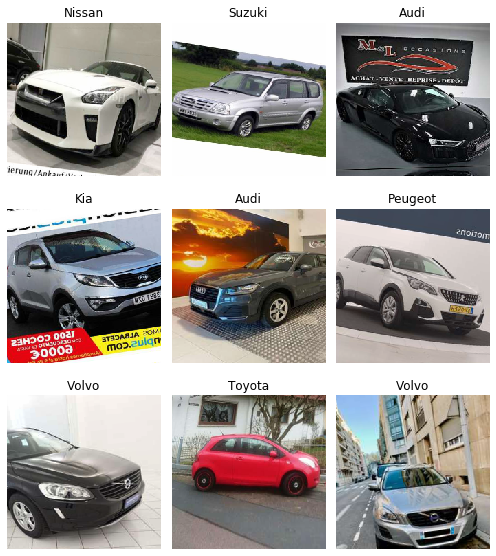

In [42]:
data.show_batch(rows=3, figsize=(7,8))

In [43]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [44]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [45]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.567932,1.922940,0.433767,06:02
1,1.721765,1.318325,0.602789,06:03
2,1.328679,1.013335,0.696062,06:03
3,1.104572,0.946002,0.712832,06:03


In [46]:
learn.save('stage-1')

In [47]:
learn.unfreeze()

In [48]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


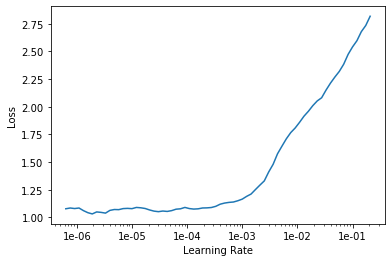

In [49]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.967461,0.750397,0.776333,08:00
1,0.723246,0.606998,0.812700,08:02
2,0.545658,0.444030,0.864707,08:03
3,0.392501,0.355459,0.892595,08:03
4,0.259320,0.305869,0.907292,08:03
5,0.166107,0.253552,0.925947,08:03
6,0.100187,0.235280,0.932165,08:03
7,0.077962,0.229258,0.933484,08:03


In [51]:
learn.save('final-brand')

## Results

93% accuracy is pretty good as some of the images don't have the car brand logo or are noisy in other ways.

Let's see where our model made mistakes.

In [52]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

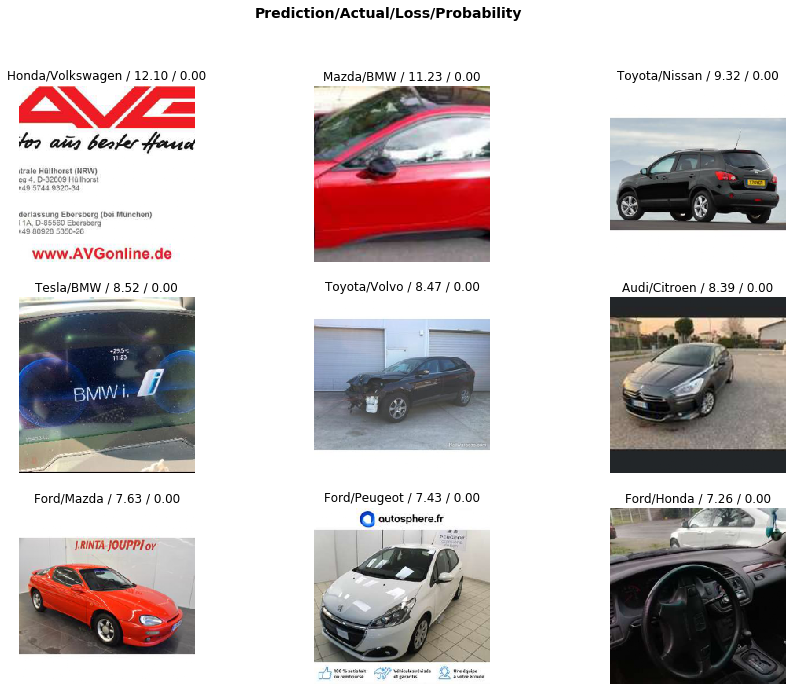

In [53]:
interp.plot_top_losses(9, figsize=(15,11))

There seems to be a few images that are not supposed to be in the dataset, but it's so few that it should not affect the model to generalize with real data. 

Therefore I can't be bothered with cleaning the dataset anymore.

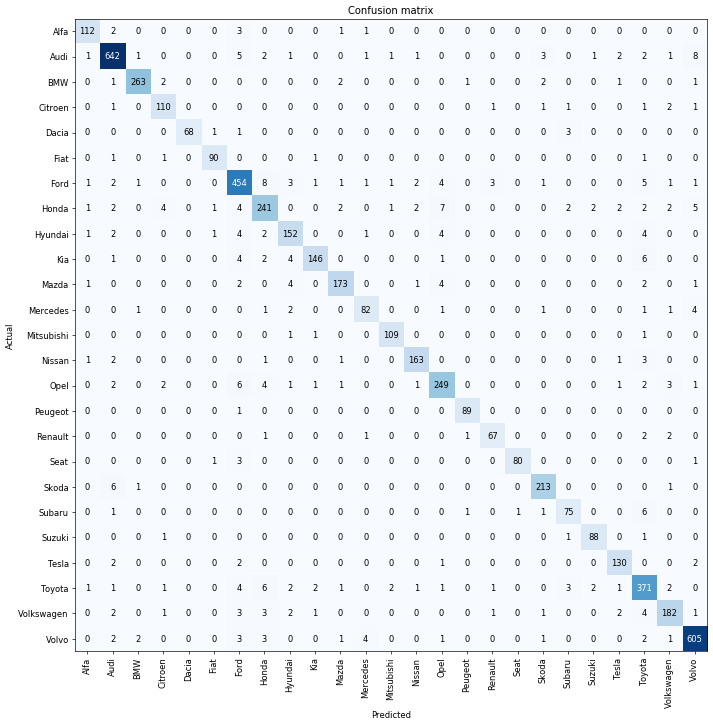

In [54]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [2]:
interp.most_confused(min_val=5)

NameError: name 'interp' is not defined

Nothing seems to pop out in these error results, most likely these correspond with images, where the log of the car is not visible enough for the model to make confident predictions.

## Export the model

In [59]:
learn.export('export_brand.pkl')

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
img = open_image(path/'Audi_A3'/'000002.jpg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class